### Business Understanding 

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

### Business Objectives

1. **Identify Top-Performing Genres and Themes**:
   - Analyze box office trends to determine which genres (e.g., action, comedy, drama) and themes (e.g., superhero stories, family-friendly content) are consistently performing well. This will help prioritize the types of films to focus on.

2. **Understand Audience Demographics and Preferences**:
   - Use data to uncover insights about the target audience, such as age groups, gender, and regional preferences. For example, are younger audiences gravitating toward animated films, or are thrillers more popular among older viewers?

3. **Evaluate Seasonal and Regional Trends**:
   - Study how box office performance varies by season (e.g., summer blockbusters, holiday releases) and region. This can help in planning release schedules and tailoring content to specific markets.

### Data Understanding 

### Project Plan: Exploring Top-Performing Film Trends for a New Movie Studio

**Overview/Background:**  
The entertainment landscape is rapidly evolving, with data-driven strategies becoming crucial to creating successful films. Your company’s decision to establish a movie studio provides an exciting opportunity to explore and capitalize on current trends dominating the box office. By understanding what audiences want—be it genres, themes, or release timing—your studio can ensure its films align with market demand. Leveraging web-scraped data from box office records, social media trends, and streaming platforms can provide actionable insights for strategic decision-making.

**Challenges:**  
One of the main challenges involves analyzing the vast volume of unstructured data collected from multiple sources. Sorting through box office trends, audience demographics, and seasonal performance patterns while ensuring data accuracy and reliability may present difficulties. Additionally, translating data insights into creative decisions without stifling artistic freedom will require a careful balance. Legal and ethical considerations, such as respecting intellectual property rights and ensuring data compliance, also remain critical.

**Proposed Solution:**  
To address these challenges, the project will implement a structured data analytics framework. Using Python and libraries like pandas for data preprocessing, statistical models will identify top-performing genres, themes, and audience preferences. Data visualization tools such as Matplotlib or Tableau will help translate insights into clear, actionable visuals for decision-makers. Machine learning algorithms can assist in predicting future trends, ensuring the studio stays ahead of the curve. Regular cross-functional meetings between creative and analytics teams will help balance data-driven strategy with artistic vision.

**Brief Conclusion:**  
By prioritizing data analysis and predictive modeling, the studio can make informed decisions about the types of films to produce. This data-driven approach will minimize risks and maximize box office success. With creativity and analytics working hand-in-hand, the movie studio can establish itself as a leader in the competitive film industry.

### Loading the Data

In [63]:
# Importing the necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting seaborn style
sns.set_style("whitegrid")

In [ ]:
# Loading the data from the different datasets
box_office_mojo = pd.read_csv("zippedData/bom.movie_gross.csv.gz", compression='gzip')
box_office_mojo.head() 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


As you can see from the output above, this dataset contains columns of information on different movies including columns for domestic and foreign gross of the movies. This columns will be the focus as it will answer some of the business questions during analysis. 

In [4]:
# Loading data from imdb(sqlite3 database file)
import sqlite3

# Path to the unzipped .db file
db_path = 'unzippedData/im.db'

# Connect to the database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Example: List all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:", tables)

# # Close the connection
# conn.close()

Tables in the database: [('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


As you can see from the output above, the sqlite3 database file contains tables with different information about movies. Some of the tables will be used to answer some of our business questions. They include: ```"movie_basics"``` and ```"movie_ratings"```.

In [14]:
# Query the 'movie_ratings' table using pandas
movie_ratings_df = pd.read_sql_query("SELECT * FROM movie_ratings;", conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [15]:
# Query the 'movie_basics' table using pandas
movie_basics_df = pd.read_sql_query("SELECT * FROM movie_basics;", conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [16]:
# Merging movie_ratings_df and movie_basics_df on the 'movie_id' column
ratings_basics_merged = movie_ratings_df.merge(movie_basics_df, on="movie_id", how="inner")

# Display the first few rows of the merged DataFrame
ratings_basics_merged.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [17]:
# Create a new DataFrame with selected columns
ratings_summary_df = ratings_basics_merged[['averagerating', 'numvotes', 'primary_title']]

# Display the first few rows of the new DataFrame
ratings_summary_df.head()

,averagerating,numvotes,primary_title
0,8.3,31,Laiye Je Yaarian
1,8.9,559,Borderless
2,6.4,20,Just Inès
3,4.2,50352,The Legend of Hercules
4,6.5,21,Até Onde?


In [ ]:
# Finding out if there is a relationship between the rating and runtime in minutes
from scipy.stats import pearsonr

# Drop rows with missing values in 'averagerating' or 'runtime_minutes'
ratings_runtime_df = ratings_basics_merged[['averagerating', 'runtime_minutes']].dropna()

# Perform Pearson correlation test
correlation, p_value = pearsonr(ratings_runtime_df['averagerating'], ratings_runtime_df['runtime_minutes'])

# Display the results
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant relationship between rating and runtime.")
else:
    print("There is no statistically significant relationship between rating and runtime.")

Pearson Correlation Coefficient: -0.006963469265963981
P-value: 0.07311196545893413
There is no statistically significant relationship between rating and runtime.


This analysis provides valuable insights into whether the length of a movie—whether longer or shorter—is associated with higher or lower audience ratings, offering clues about viewer preferences. However, it's crucial to emphasize that a correlation between runtime and ratings does not necessarily indicate causation. Even if a strong statistical link would have been observed, it would not imply that the duration of a movie directly affects how audiences rate it.

In [6]:
# Loading data from rotten tomatoes
rotten_tomatoes_data = pd.read_csv('zippedData/rt.movie_info.tsv.gz', compression='gzip', sep='\t')
rotten_tomatoes_data.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


While loading the data, the parameters ```compression='gzip'``` was needful to handle decompressing the file when reading it and the parameter ```sep=\t``` which ensured the data is correctly parsed with tab-separated columns instead of the default comma-separated format(CSV)

In [7]:
rotten_tomatoes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


As you can see from the output above, this dataset contains several columns with information on different movies. Some of the information that could be of use to us would have been ```box_office```. However, after getting the information of the dataset, the column of interest has many missing values. This dataset therefore wouldn't be of use to answer the business questions. 

In [8]:
# Loading data from the movie database
the_movies_db = pd.read_csv("zippedData/tmdb.movies.csv.gz", compression='gzip')
the_movies_db.tail()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [22]:
the_movies_db.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

To understand better the genres of the different movies, I looked up the movie genre ids from [The Movie Database](https://www.themoviedb.org) and found how to interpret them [Genre IDs](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee.). Therefore, I am going to insert a column ```genre``` in the table to highlight which specific genre each movie is. 

In [39]:
# Mapping genre IDs to genre names using a dictionary
genre_dict = {
    28: "Action", 12: "Adventure", 16: "Animation", 35: "Comedy", 80: "Crime",
    99: "Documentary", 18: "Drama", 10751: "Family", 14: "Fantasy", 36: "History",
    27: "Horror", 10402: "Music", 9648: "Mystery", 10749: "Romance", 878: "Science Fiction",
    10770: "TV Movie", 53: "Thriller", 10752: "War", 37: "Western"
}

In [ ]:
# Convert genre IDs to genre names
import json
the_movies_db['genre_names'] = the_movies_db['genre_ids'].apply(
    lambda x: [genre_dict.get(genre_id, "Unknown") for genre_id in json.loads(x)]
)

# Display the updated DataFrame
the_movies_db[['genre_ids', 'genre_names']].head()

,genre_ids,genre_names
0,"[12, 14, 10751]","[Adventure, Fantasy, Family]"
1,"[14, 12, 16, 10751]","[Fantasy, Adventure, Animation, Family]"
2,"[12, 28, 878]","[Adventure, Action, Science Fiction]"
3,"[16, 35, 10751]","[Animation, Comedy, Family]"
4,"[28, 878, 12]","[Action, Science Fiction, Adventure]"


In [ ]:
# Sorting the_movies_db by highest popularity
the_movies_db.sort_values(by="popularity", ascending=False)


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,"[Adventure, Action, Fantasy]"
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,"[Action, Thriller]"
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,"[Action, Adventure, Animation, Science Fiction..."
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392,"[Action, Adventure, Fantasy]"
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,"[Science Fiction, Action, Adventure]"


As you can see from the output above, this dataset contains several columns with information on different movies. Some of the columns are of interest and will be used to answer the business questions as will be seen. 

In [34]:
# Loading data from "the numbers website" 
movie_numbers = pd.read_csv("zippedData/tn.movie_budgets.csv.gz", compression='gzip')
movie_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


As you can see from the output above, this dataset contains several columns with information on different movies. The information includes gross of different movies, production budges and the release dates of the movies. 

As shown below, the ```the_movies_db``` and ```movie_numbers``` dataframes have been merged to enable tracking of certain columns that will answer the business questions best. 

In [41]:
# Merging the two dataframes
merged_movies_info = movie_numbers.merge(the_movies_db, left_on='movie', right_on='title', how='inner')
merged_movies_info.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,genre_names
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,"[Action, Adventure, Fantasy, Science Fiction]"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,"[Adventure, Action, Fantasy]"
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457,"[Action, Adventure, Science Fiction]"
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,"[Adventure, Action, Fantasy]"
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510,"[Action, Adventure, Fantasy, Science Fiction]"


In [42]:
# The merged dataframe columns
merged_movies_info.columns

Index(['id_x', 'release_date_x', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'Unnamed: 0', 'genre_ids', 'id_y',
       'original_language', 'original_title', 'popularity', 'release_date_y',
       'title', 'vote_average', 'vote_count', 'genre_names'],
      dtype='object')

Some of the columns in the ```merged_movies_info``` are redundant. To be able to answer our business questions, some columns will be selected specifically and assigned to a dataframe ```selected_merged_movies_info```.

In [53]:
# Specific columns selected from the merged_movies_info dataframe
selected_merged_movies_info = merged_movies_info[['release_date_x' ,'movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'popularity', 'vote_average', 'genre_names']]
# Rename the 'release_date_x' column to 'release_date'
selected_merged_movies_info.rename(columns={'release_date_x': 'release_date'}, inplace=True)
# Display the first 30 rows of the updated DataFrame
selected_merged_movies_info.head()

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,release_date,movie,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,genre_names
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",26.526,7.4,"[Action, Adventure, Fantasy, Science Fiction]"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",30.579,6.4,"[Adventure, Action, Fantasy]"
2,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",44.383,7.3,"[Action, Adventure, Science Fiction]"
3,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",80.773,8.3,"[Adventure, Action, Fantasy]"
4,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",34.953,6.2,"[Action, Adventure, Fantasy, Science Fiction]"


### Objective 1: Evaluate seasonal and regional trends

To fulfill the objective, various metrics were systematically analyzed to derive the desired insights and findings.

i. Analyze Box Office Performance by Release Month and Season:
 Identify trends in revenue across different months and seasons (e.g., summer blockbusters, holiday releases). Determine which months or seasons generate the highest average revenue for films

ii. Examine Regional Audience Preferences:
 Investigate how box office performance varies by region (e.g., North America, Europe, Asia) and identify genres or themes that are particularly popular in specific locations

iii. Identify Underperforming Trends to Avoid:
 Pinpoint genres, themes, or release timings that consistently fail to meet expectations in specific regions or seasons, helping the studio steer clear of high-risk decisions.



In the operation that follows, the month and/or season has been extracted from the release date to analyze how movies perform during different times of the year (e.g., summer blockbusters, holiday releases). The data has been grouped by month or season and may help to calculate the average or total gross revenue on different seasons or months. 

In [ ]:
# Convert release date to datetime 
selected_merged_movies_info['release_date'] = pd.to_datetime(selected_merged_movies_info['release_date'])

# Extract month or season
selected_merged_movies_info['month'] = selected_merged_movies_info['release_date'].dt.month
selected_merged_movies_info['season'] = selected_merged_movies_info['month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] 
    else 'Spring' if x in [3, 4, 5] 
    else 'Summer' if x in [6, 7, 8] 
    else 'Fall'
)

selected_merged_movies_info.head()

<ipython-input-57-4d1a8d94f228>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_merged_movies_info['release_date'] = pd.to_datetime(selected_merged_movies_info['release_date'])
<ipython-input-57-4d1a8d94f228>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_merged_movies_info['month'] = selected_merged_movies_info['release_date'].dt.month
<ipython-input-57-4d1a8d94f228>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,release_date,movie,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,genre_names,month,season
0,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",26.526,7.4,"[Action, Adventure, Fantasy, Science Fiction]",12,Winter
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",30.579,6.4,"[Adventure, Action, Fantasy]",5,Spring
2,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",44.383,7.3,"[Action, Adventure, Science Fiction]",5,Spring
3,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",80.773,8.3,"[Adventure, Action, Fantasy]",4,Spring
4,2017-11-17,Justice League,"$300,000,000","$229,024,295","$655,945,209",34.953,6.2,"[Action, Adventure, Fantasy, Science Fiction]",11,Fall


In [ ]:
# Getting the general information of the dataframe
selected_merged_movies_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       2385 non-null   datetime64[ns]
 1   movie              2385 non-null   object        
 2   production_budget  2385 non-null   object        
 3   domestic_gross     2385 non-null   object        
 4   worldwide_gross    2385 non-null   object        
 5   popularity         2385 non-null   float64       
 6   vote_average       2385 non-null   float64       
 7   genre_names        2385 non-null   object        
 8   month              2385 non-null   int64         
 9   season             2385 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 205.0+ KB


In [60]:
# Remove non-numeric characters and convert to float
selected_merged_movies_info['production_budget'] = selected_merged_movies_info['production_budget'].replace('[\$,]', '', regex=True).astype(float)
selected_merged_movies_info['domestic_gross'] = selected_merged_movies_info['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
selected_merged_movies_info['worldwide_gross'] = selected_merged_movies_info['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Display the updated DataFrame
selected_merged_movies_info.head()

<ipython-input-60-e1b695b8aba1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_merged_movies_info['production_budget'] = selected_merged_movies_info['production_budget'].replace('[\$,]', '', regex=True).astype(float)
<ipython-input-60-e1b695b8aba1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_merged_movies_info['domestic_gross'] = selected_merged_movies_info['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
<ipython-input-60-e1b695b8aba1>:4: SettingWithCopyWarning: 
A 

,release_date,movie,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,genre_names,month,season
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,26.526,7.4,"[Action, Adventure, Fantasy, Science Fiction]",12,Winter
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,30.579,6.4,"[Adventure, Action, Fantasy]",5,Spring
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,44.383,7.3,"[Action, Adventure, Science Fiction]",5,Spring
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,80.773,8.3,"[Adventure, Action, Fantasy]",4,Spring
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,34.953,6.2,"[Action, Adventure, Fantasy, Science Fiction]",11,Fall


The above transformations make sure the financial data in these columns is converted into a consistent numeric format, which is essential for further analysis like comparing budgets to revenues or figuring out profitability. Without this step, non-numeric characters in the data could cause errors when performing calculations or other numerical operations.

In [61]:
# Analyze gross revenue by season
seasonal_trends = selected_merged_movies_info.groupby('season')[['domestic_gross', 'worldwide_gross']].mean()
print(seasonal_trends)

        domestic_gross  worldwide_gross
season                                 
Fall      4.404959e+07     1.090718e+08
Spring    5.037449e+07     1.274537e+08
Summer    6.043502e+07     1.441817e+08
Winter    4.489869e+07     1.032181e+08


### i. Analyze Box Office Performance by Release Month and Season

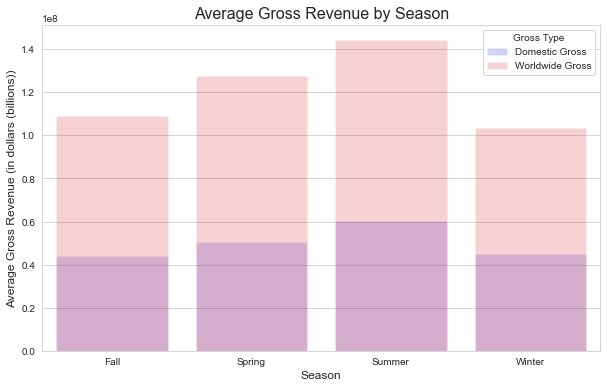

In [88]:
# Group by season and calculate average domestic and worldwide gross
seasonal_trends = selected_merged_movies_info.groupby('season')[['domestic_gross', 'worldwide_gross']].mean().reset_index()

# Plot average gross revenue by season
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='domestic_gross', data=seasonal_trends, label='Domestic Gross', color='blue', alpha=0.2)
sns.barplot(x='season', y='worldwide_gross', data=seasonal_trends, label='Worldwide Gross', color='red', alpha=0.2)
plt.title('Average Gross Revenue by Season', fontsize=16)
plt.ylabel('Average Gross Revenue (in dollars (billions))', fontsize=12)
plt.xlabel('Season', fontsize=12)
plt.legend(title='Gross Type')
plt.show()

The bar plot of average gross revenue by season shows that Summer has the highest average worldwide and domestic gross, followed by Winter.

Spring and Fall have comparatively lower average gross revenues.

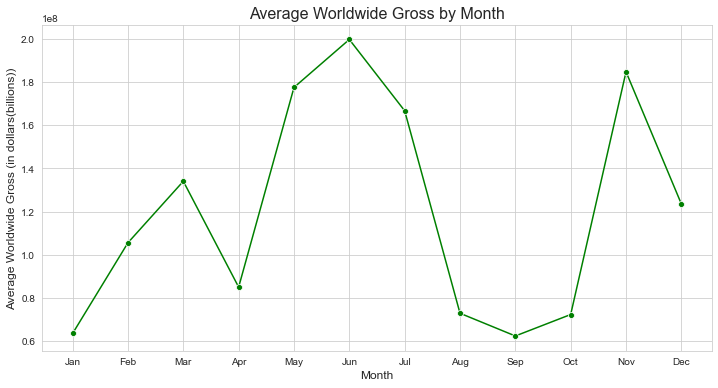

In [ ]:
# Group by month and calculate average worldwide gross
monthly_trends = selected_merged_movies_info.groupby(selected_merged_movies_info['release_date'].dt.month)[['worldwide_gross']].mean().reset_index()
monthly_trends.rename(columns={'release_date': 'month'}, inplace=True)

# Plot average worldwide gross by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='worldwide_gross', data=monthly_trends, marker='o', color='green')
plt.title('Average Worldwide Gross by Month', fontsize=16)
plt.ylabel('Average Worldwide Gross (in dollars(billions))', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show(); 

The line plot of average worldwide gross by month highlights a peak in June, July, and December, corresponding to summer blockbusters and holiday releases.

### Hypothesis Testing

Null hypothesis (H₀): "The average worldwide gross of movies does not differ significantly between Summer and Winter"

Alternative hypothesis (H₁): "The average worldwide gross of movies differs significantly between Summer and Winter."

In [78]:
from scipy.stats import ttest_ind

# Filter data for Summer and Winter
summer_gross = selected_merged_movies_info[selected_merged_movies_info['season'] == 'Summer']['worldwide_gross'].dropna()
winter_gross = selected_merged_movies_info[selected_merged_movies_info['season'] == 'Winter']['worldwide_gross'].dropna()

# Perform t-test
t_stat, p_value = ttest_ind(summer_gross, winter_gross, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in worldwide gross between Summer and Winter.")
else:
    print("There is no significant difference in worldwide gross between Summer and Winter.")

T-statistic: 3.097935906062286, P-value: 0.001998854761941551
There is a significant difference in worldwide gross between Summer and Winter.


### Conclusions

- Summer and Winter are the most lucrative seasons for movie releases, likely due to school vacations, holidays, and blockbuster marketing strategies.

- Spring and Fall are less profitable, possibly due to fewer holidays and competing priorities for audiences.

### Recommendations

- Focus on releasing high-budget, action-packed, or family-friendly movies during Summer and Winter to maximize box office revenue.

- Use Spring and Fall for niche or experimental films with lower budgets to minimize risks.

### ii. Examine Regional Audience Preferences

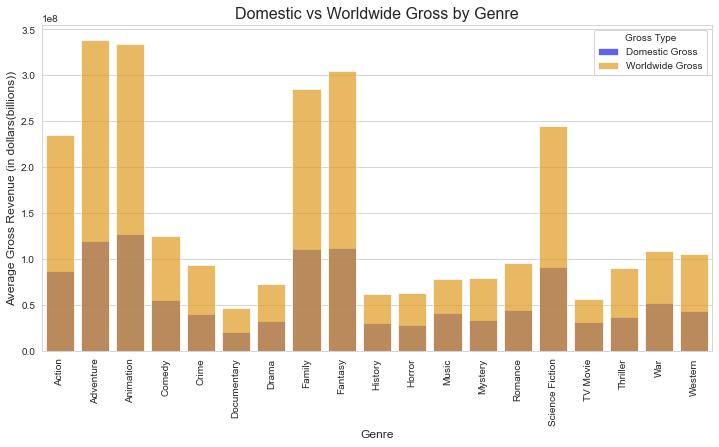

In [96]:
# Explode the genre_names column to separate each genre into its own row
exploded_movies_info = selected_merged_movies_info.explode('genre_names')

# Group by genre and calculate average domestic and worldwide gross
regional_trends = exploded_movies_info.groupby('genre_names')[['domestic_gross', 'worldwide_gross']].mean().reset_index()

# Plot domestic vs worldwide gross by genre
plt.figure(figsize=(12, 6))
sns.barplot(x='genre_names', y='domestic_gross', data=regional_trends, label='Domestic Gross', color='blue', alpha=0.7)
sns.barplot(x='genre_names', y='worldwide_gross', data=regional_trends, label='Worldwide Gross', color='orange', alpha=0.7)
plt.title('Domestic vs Worldwide Gross by Genre', fontsize=16)
plt.ylabel('Average Gross Revenue (in dollars(billions))', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.legend(title='Gross Type')
plt.xticks(rotation=90)
plt.show()

### Observations

- The bar plot comparing domestic and worldwide gross by genre shows that genres like Action, Adventure, and Family perform significantly better worldwide than domestically.

- Genres like Drama and Comedy have a more balanced performance between domestic and worldwide markets.

- Documentary and Horror genres have relatively low gross revenues in both domestic and worldwide markets.

### Conclusions

- Action, Adventure, and Family genres have strong global appeal, making them ideal for international markets.

- Drama and Comedy genres cater well to domestic audiences but may require tailored marketing strategies for international success.

- Documentary and Horror genres have limited appeal and may not generate significant revenue.

### Recommendations

- Prioritize Action, Adventure, and Family genres for international releases to capitalize on their global popularity.

- Invest in localized marketing for Drama and Comedy genres to enhance their performance in international markets.

- Limit investments in Documentary and Horror genres unless targeting niche audiences or festivals.

### iii. Identify underperforming trends to avoid

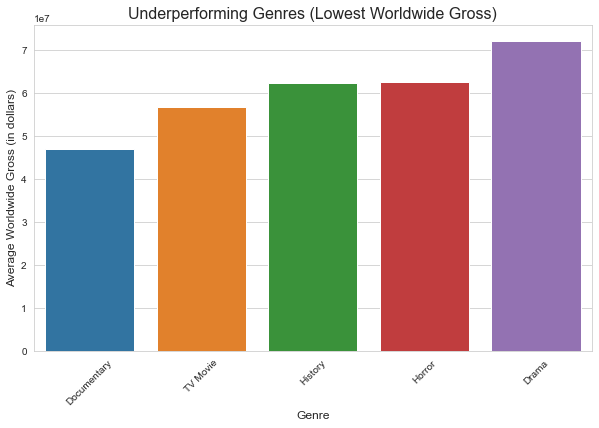

In [102]:
# Identify genres with the lowest average worldwide gross
underperforming_genres = regional_trends.sort_values(by='worldwide_gross', ascending=True).head(5)

# Plot underperforming genres
plt.figure(figsize=(10, 6))
sns.barplot(x='genre_names', y='worldwide_gross', data=underperforming_genres)
plt.title('Underperforming Genres (Lowest Worldwide Gross)', fontsize=16)
plt.ylabel('Average Worldwide Gross (in dollars)', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation=45)
plt.show(); 

The bar plot of underperforming genres shows that Documentary, TV Movies and History genres have the lowest average worldwide gross.

### Conclusions
- Documentary, TV Movies and History genres are high-risk investments with limited revenue potential.

### Recommendations

- Avoid producing high-budget films in Documentary, TV Movies and History genres unless targeting specific niche markets or festivals.

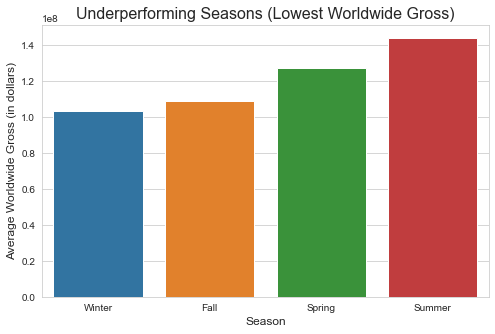

In [101]:
# Identify seasons with the lowest average worldwide gross
underperforming_seasons = seasonal_trends.sort_values(by='worldwide_gross', ascending=True)

# Plot underperforming seasons
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='worldwide_gross', data=underperforming_seasons)
plt.title('Underperforming Seasons (Lowest Worldwide Gross)', fontsize=16)
plt.ylabel('Average Worldwide Gross (in dollars)', fontsize=12)
plt.xlabel('Season', fontsize=12)
plt.show(); 

The bar plot of underperforming seasons indicates that Fall has the lowest average worldwide gross, followed by Spring.

### Conclusions 

- Winter and Fall are less favorable seasons for movie releases, likely due to fewer holidays and competing entertainment options.

### Recommendations

- Schedule major releases during Summer and Winter, while using Fall and Spring for smaller-scale or experimental projects.

- Consider alternative distribution channels (e.g., streaming platforms) for underperforming genres to reduce financial risks.

Analysis Ideas:
Compare the performance of movies in domestic vs. international markets.
Identify genres (genre_names) that perform better in domestic markets versus worldwide markets.
If additional regional data (e.g., country-specific gross) is available, you can analyze trends by specific regions.

In [ ]:
# Compare domestic vs worldwide gross
selected_merged_movies_info['domestic_vs_worldwide_ratio'] = (
    selected_merged_movies_info['domestic_gross'] / selected_merged_movies_info['worldwide_gross']
)

# Analyze by genre
regional_trends = selected_merged_movies_info.groupby('genre_names')[['domestic_gross', 'worldwide_gross']].mean()
print(regional_trends)

## Objective 2: Identify top-performing genres and themes

i. Analyze Average Revenue by Genre:
   - Determine which genres have the highest average worldwide gross revenue over a given period. This helps identify consistently top-performing genres at the box office.

ii. Evaluate Genre-Specific Growth Trends:
   - Investigate how the popularity of different genres has changed over time (e.g., year-to-year gross revenue trends). This insight can highlight emerging or declining genre trends.

iii. Assess the Relationship Between Genre and Production Budget:
   - Explore whether higher budgets are associated with better performance for certain genres. This can inform investment strategies when deciding on genre-specific productions.

### i. Analyze average revenue by genre

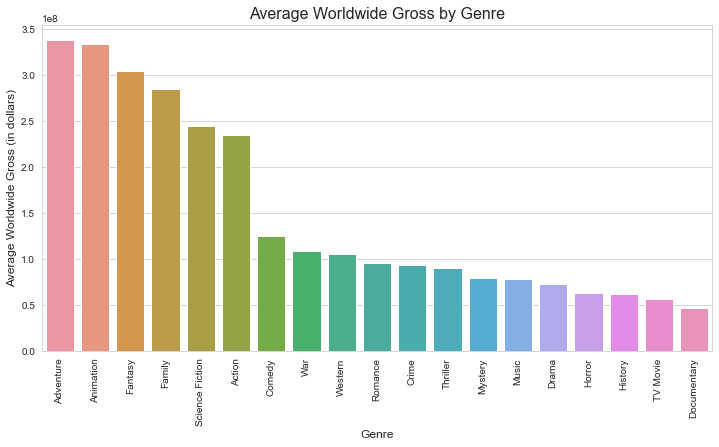

In [104]:
# Group by genre and calculate average worldwide gross
average_revenue_by_genre = selected_merged_movies_info.explode('genre_names').groupby('genre_names')[['worldwide_gross']].mean().reset_index()

# Sort genres by average worldwide gross
average_revenue_by_genre = average_revenue_by_genre.sort_values(by='worldwide_gross', ascending=False)

# Plot average worldwide gross by genre
plt.figure(figsize=(12, 6))
sns.barplot(x='genre_names', y='worldwide_gross', data=average_revenue_by_genre)
plt.title('Average Worldwide Gross by Genre', fontsize=16)
plt.ylabel('Average Worldwide Gross (in dollars)', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation=90)
plt.show(); 

The bar plot shows that genres like Adventure, Animation and Family have the highest average worldwide gross revenue.
Genres such as Documentary, TV Movie and History have the lowest average worldwide gross revenue.

### Conclusions

- Adventure, Animation and Family genres are consistently top-performing at the box office.

- Documentary, TV Movie and History genres generate significantly lower revenue, indicating limited audience appeal.

### Recommendations

- Focus on producing Adventure, Animation and Family movies to maximize box office revenue.

- Avoid high-budget investments in Documentary, TV Movie and History genres unless targeting niche audiences or festivals.

### ii. Evaluate genre-specific growth trends

<ipython-input-112-6de9368c866e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_merged_movies_info['release_year'] = selected_merged_movies_info['release_date'].dt.year


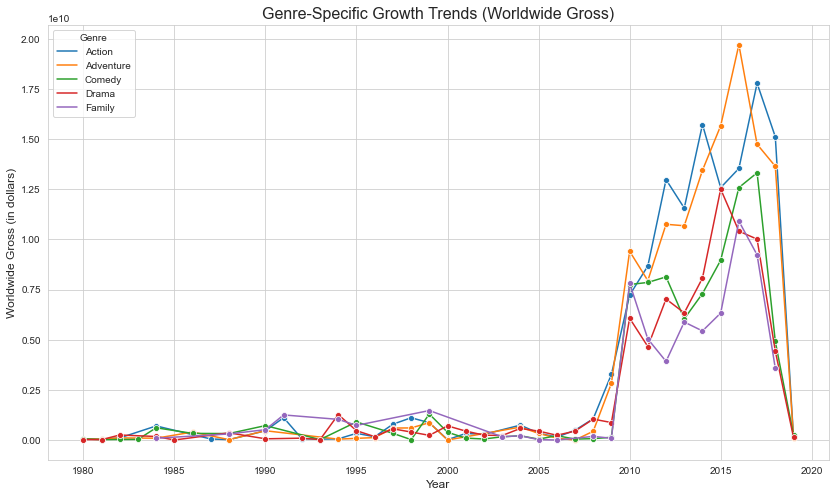

In [112]:
# Extract year from release_date
selected_merged_movies_info['release_year'] = selected_merged_movies_info['release_date'].dt.year

# Filter data to include only years starting from 1980
genre_growth_trends = selected_merged_movies_info.explode('genre_names')
genre_growth_trends = genre_growth_trends[genre_growth_trends['release_year'] >= 1980]

# Group by genre and year, calculate total worldwide gross
genre_growth_trends = genre_growth_trends.groupby(['release_year', 'genre_names'])[['worldwide_gross']].sum().reset_index()

# Filter for top genres (e.g., Action, Adventure, Drama, Comedy, Family)
top_genres = ['Action', 'Adventure', 'Drama', 'Comedy', 'Family']
filtered_genre_growth = genre_growth_trends[genre_growth_trends['genre_names'].isin(top_genres)]

# Plot genre-specific growth trends
plt.figure(figsize=(14, 8))
sns.lineplot(x='release_year', y='worldwide_gross', hue='genre_names', data=filtered_genre_growth, marker='o')
plt.title('Genre-Specific Growth Trends (Worldwide Gross)', fontsize=16)
plt.ylabel('Worldwide Gross (in dollars)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend(title='Genre')
plt.show()

The line plot shows that genres like Action and Adventure have experienced consistent growth in worldwide gross over the years.

Drama and Comedy genres show fluctuations in revenue, indicating varying audience interest over time.

Family movies show steady performance, with occasional peaks during specific years.

### Conclusions 

- Action and Adventure genres are growing in popularity and remain reliable investments.

- Drama and Comedy genres require careful timing and marketing to capitalize on audience interest.

- Family movies maintain steady appeal, making them a safe choice for consistent revenue.

### Recommendations

- Invest in Action and Adventure movies to capitalize on their growing popularity.
- Use targeted marketing strategies for Drama and Comedy movies to align with audience preferences.

- Continue producing Family movies, especially during holiday seasons, to ensure steady returns.

### iii. Assessing relationship between genre and production budget

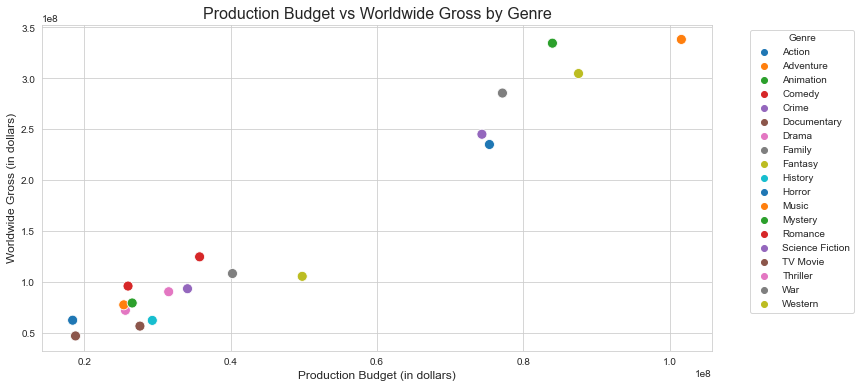

In [110]:
# Group by genre and calculate average production budget and worldwide gross
budget_vs_revenue = selected_merged_movies_info.explode('genre_names').groupby('genre_names')[['production_budget', 'worldwide_gross']].mean().reset_index()

# Plot production budget vs worldwide gross by genre
plt.figure(figsize=(12, 6))
sns.scatterplot(x='production_budget', y='worldwide_gross', hue='genre_names', data=budget_vs_revenue, palette='tab10', s=100)
plt.title('Production Budget vs Worldwide Gross by Genre', fontsize=16)
plt.ylabel('Worldwide Gross (in dollars)', fontsize=12)
plt.xlabel('Production Budget (in dollars)', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The scatter plot shows that genres like Adventure, Fantasy and Animation tend to have higher production budgets and correspondingly higher worldwide gross revenue.

Genres like Documentary and Horror have lower production budgets but also generate lower revenue.

### Conclusions

- Higher production budgets are associated with higher revenue for genres like Adventure, Fantasy and Animation indicating a strong return on investment.

- Low-budget genres like Documentary and Horror may not yield significant revenue, even with minimal investment.

### Recommendations

- Allocate higher budgets to Action and Adventure movies to maximize returns.

- Limit investments in low-budget genres like Documentary and Horror unless targeting specific niche markets.

- Use data-driven budgeting strategies to optimize spending across genres based on expected revenue potential.

## Objective 3: Understanding audience preferences

i. Analyze Genre Preferences Across Audience Demographics:
   - Examine how different genres appeal to various demographic groups (e.g., age, gender). Identify the most popular genres for key audience segments to guide targeted content creation.

ii. Identify Correlation Between Movie Themes and Audience Engagement:
   - Assess which themes, storylines, or narratives (e.g., family-oriented, action-packed, emotional dramas) drive higher engagement (e.g., higher box office gross, repeat viewings, or ratings).

iii. Explore Regional Variations in Audience Preferences:
   - Investigate how preferences for genres and themes vary across regions. This will provide insights into tailoring content for specific geographic markets.

iv. Examine the Relationship Between Movie Ratings and Audience Reception:
   - Analyze how critic and audience ratings impact box office success, helping identify the types of movies audiences consistently appreciate and reward.

### i. Analyze genre preferences across audience demographics

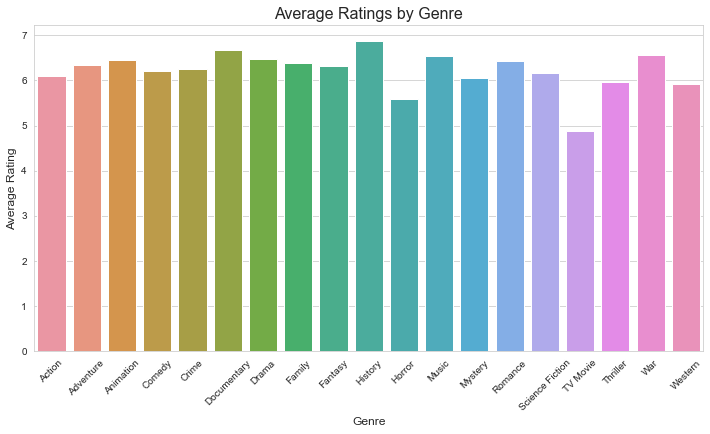

In [115]:
# Explode genre_names to separate each genre into its own row
exploded_movies_info = selected_merged_movies_info.explode('genre_names')

# Group by genre and calculate average ratings and votes
genre_demographics = exploded_movies_info.groupby('genre_names')[['vote_average', 'popularity']].mean().reset_index()

# Plot average ratings by genre
plt.figure(figsize=(12, 6))
sns.barplot(x='genre_names', y='vote_average', data=genre_demographics)
plt.title('Average Ratings by Genre', fontsize=16)
plt.ylabel('Average Rating', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation=45)
plt.show()

The bar plot of average ratings by genre shows that genres like Documentary and History receive higher average ratings.

### Conclusion

- History and Documentary genres are critically well-received but may not always translate to high popularity.

### Recommendations

- Focus on producing Action, Adventure, and Family movies to cater to audience preferences.

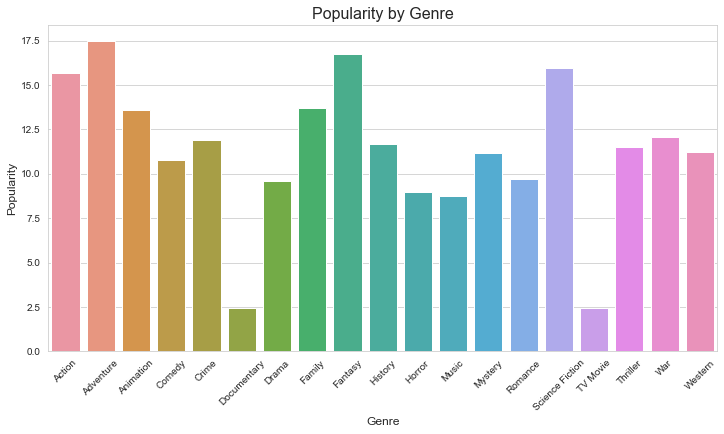

In [114]:
# Plot popularity by genre
plt.figure(figsize=(12, 6))
sns.barplot(x='genre_names', y='popularity', data=genre_demographics)
plt.title('Popularity by Genre', fontsize=16)
plt.ylabel('Popularity', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation=45)
plt.show()

The popularity plot indicates that Adventure, Fantasy and Science Fiction genres are the most popular among audiences.

### Conclusion

- Adventure, Fantasy and Science Fiction genres are highly popular, indicating strong audience engagement.

### Recommendations

- Consider creating high-quality Drama and TV Movies films for niche audiences or awards recognition.

### ii. Explore regional variations in audience preferences

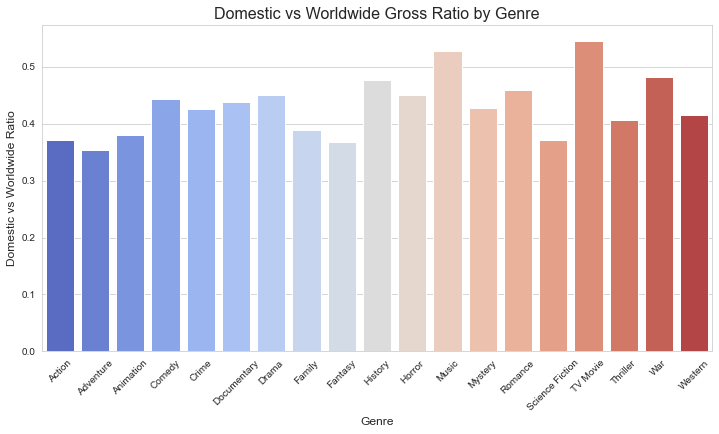

In [120]:
# Group by genre and calculate domestic vs worldwide gross ratio
regional_preferences = exploded_movies_info.groupby('genre_names')[['domestic_gross', 'worldwide_gross']].mean().reset_index()
regional_preferences['domestic_vs_worldwide_ratio'] = regional_preferences['domestic_gross'] / regional_preferences['worldwide_gross']

# Plot domestic vs worldwide gross ratio by genre
plt.figure(figsize=(12, 6))
sns.barplot(x='genre_names', y='domestic_vs_worldwide_ratio', data=regional_preferences, palette='coolwarm')
plt.title('Domestic vs Worldwide Gross Ratio by Genre', fontsize=16)
plt.ylabel('Domestic vs Worldwide Ratio', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation=45)
plt.show()

The domestic vs worldwide gross ratio plot shows that genres like Music and TV Movie perform relatively better domestically.

Genres like Adventure, Fantasy and Science Fiction perform significantly better worldwide than domestically.

### Conclusions

- Adventure, Fantasy and Science Fiction genres have strong global appeal, making them ideal for international markets.

- Music and TV Movie genres cater well to domestic audiences but may require tailored marketing strategies for international success.

### Recommendations

- Prioritize Adventure, Fantasy and Science Fiction genres for international releases to capitalize on their global popularity.

- Invest in localized marketing for Music and TV Movie genres to enhance their performance in international markets.

### iv. Examine the relationship between movie ratings and audience reception

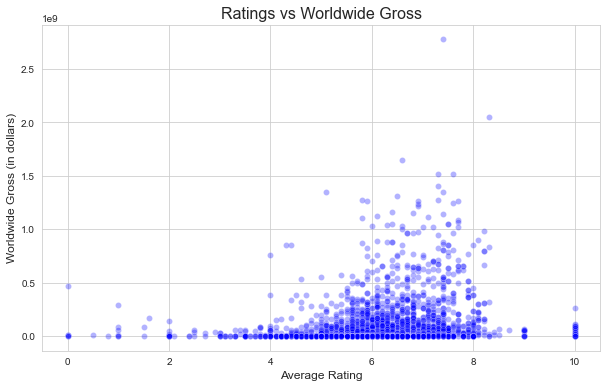

In [ ]:
# Scatter plot of ratings vs worldwide gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='worldwide_gross', data=selected_merged_movies_info, alpha=0.3, color='blue')
plt.title('Ratings vs Worldwide Gross', fontsize=16)
plt.ylabel('Worldwide Gross (in dollars)', fontsize=12)
plt.xlabel('Average Rating', fontsize=12) 
plt.show()

The scatter plot of ratings vs worldwide gross shows a slight positive trend, indicating that higher-rated movies tend to perform better at the box office.

### Conclusions

- While higher ratings are associated with better box office performance, other factors like marketing and genre also play a significant role.

### Recommendations

- Focus on producing high-quality movies that balance critical acclaim and audience appeal.

In [123]:
# Correlation between ratings and worldwide gross
from scipy.stats import pearsonr

# Drop rows with missing values in 'vote_average' or 'worldwide_gross'
ratings_gross_data = selected_merged_movies_info[['vote_average', 'worldwide_gross']].dropna()

# Perform Pearson correlation test
correlation, p_value = pearsonr(ratings_gross_data['vote_average'], ratings_gross_data['worldwide_gross'])
print(f"Correlation: {correlation}, P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant positive correlation between ratings and worldwide gross.")
else:
    print("There is no significant correlation between ratings and worldwide gross.")

Correlation: 0.19281133600528375, P-value: 2.087525814333377e-21
There is a significant positive correlation between ratings and worldwide gross.


The correlation analysis reveals a weak but positive relationship between ratings and worldwide gross.

### Conclusions 

- Audience reception is influenced by both critical acclaim and broader appeal.

### Recommendations

- Use ratings as a supplementary metric to evaluate potential box office success.